# Support Vector Machine


## Imports


In [1]:
import util
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC


## Read the data


### Train Data


In [2]:
X, y = util.getData(path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X['weightOverHeightSquared'] = X['Weight'] / X['Height'] ** 2

# X = X[['Weight', 'Height']]


### Validation Data


In [3]:
# Divide the train data into training and validation
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_val = X[int(0.8 * len(X)):]
y_val = y[int(0.8 * len(y)):]


### Test Data


In [4]:
X_test, y_test = util.getData(
    path='../data/train_data.csv', scaleNumericalFeatures=True)

# create a new column called weightOverHeightSquared
# X_test['weightOverHeightSquared'] = X_test['Weight'] / X_test['Height'] ** 2

# X_test = X_test[['Weight', 'Height']]


## Train the model


In [5]:
# clf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split= 2)
# clf.fit(X, y)
svm = SVC(gamma='auto', kernel='linear', C=1.0, random_state=0)
svm.fit(X, y)
cv_results = cross_validate(svm, X, y, cv=5, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9593577916040907
f1_macro:  0.9387174726785437
f1_micro:  0.9593577916040907


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


                            feature  importance
0                            Weight    6.266359
1                            Height    1.513414
14              Transport_Motorbike    1.000000
13                   Transport_Bike    0.700974
15  Transport_Public_Transportation    0.651020
12             Transport_Automobile    0.612047
16                Transport_Walking    0.437907
7                       Smoking_yes    0.221030
6                        Smoking_no    0.221030
2                               Age    0.151135
4                          Phys_Act    0.108470
5                     Water_Consump    0.094435
3                        Meal_Count    0.062213
11               Alcohol_Consump_no    0.028266
10        Alcohol_Consump_Sometimes    0.019803
9        Alcohol_Consump_Frequently    0.008463
8            Alcohol_Consump_Always    0.000000


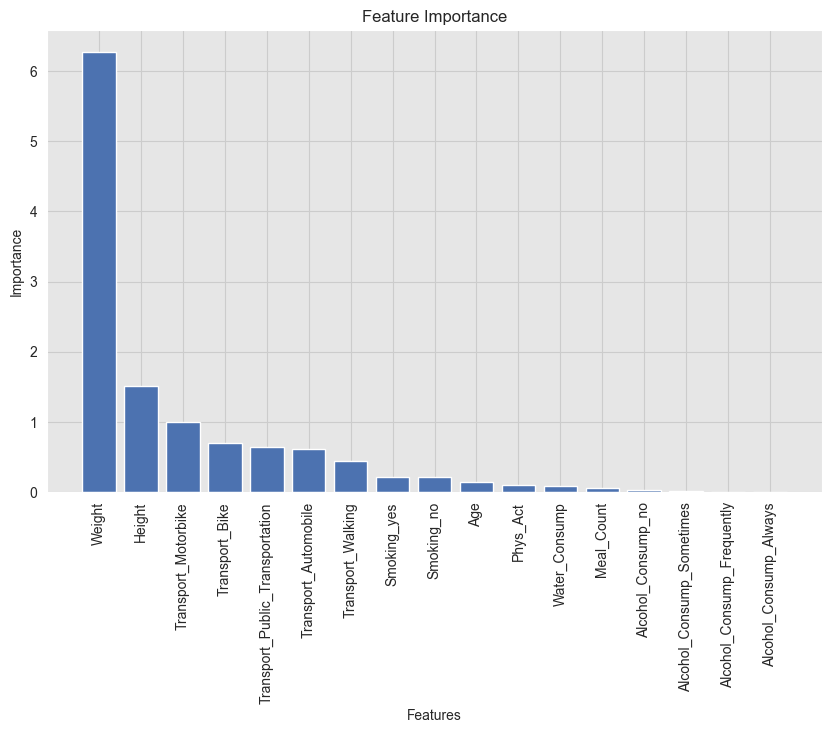

In [6]:
# Get the feature importance
importance = np.abs(svm.coef_[0])

feature_importance = util.getFeatureImportance(
    features=X.columns, importance=importance)
print(feature_importance)

plt = util.getFeatureImportancePlot(feature_importance)
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


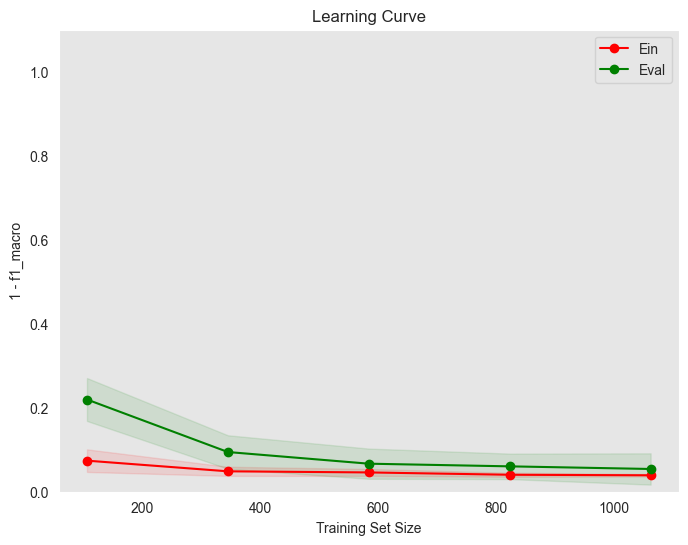

In [7]:
plt = util.getLearningCurvePlot(estimator=SVC(
    gamma='auto', kernel='linear', C=1.0, random_state=0), X=X, y=y, cv=10)
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


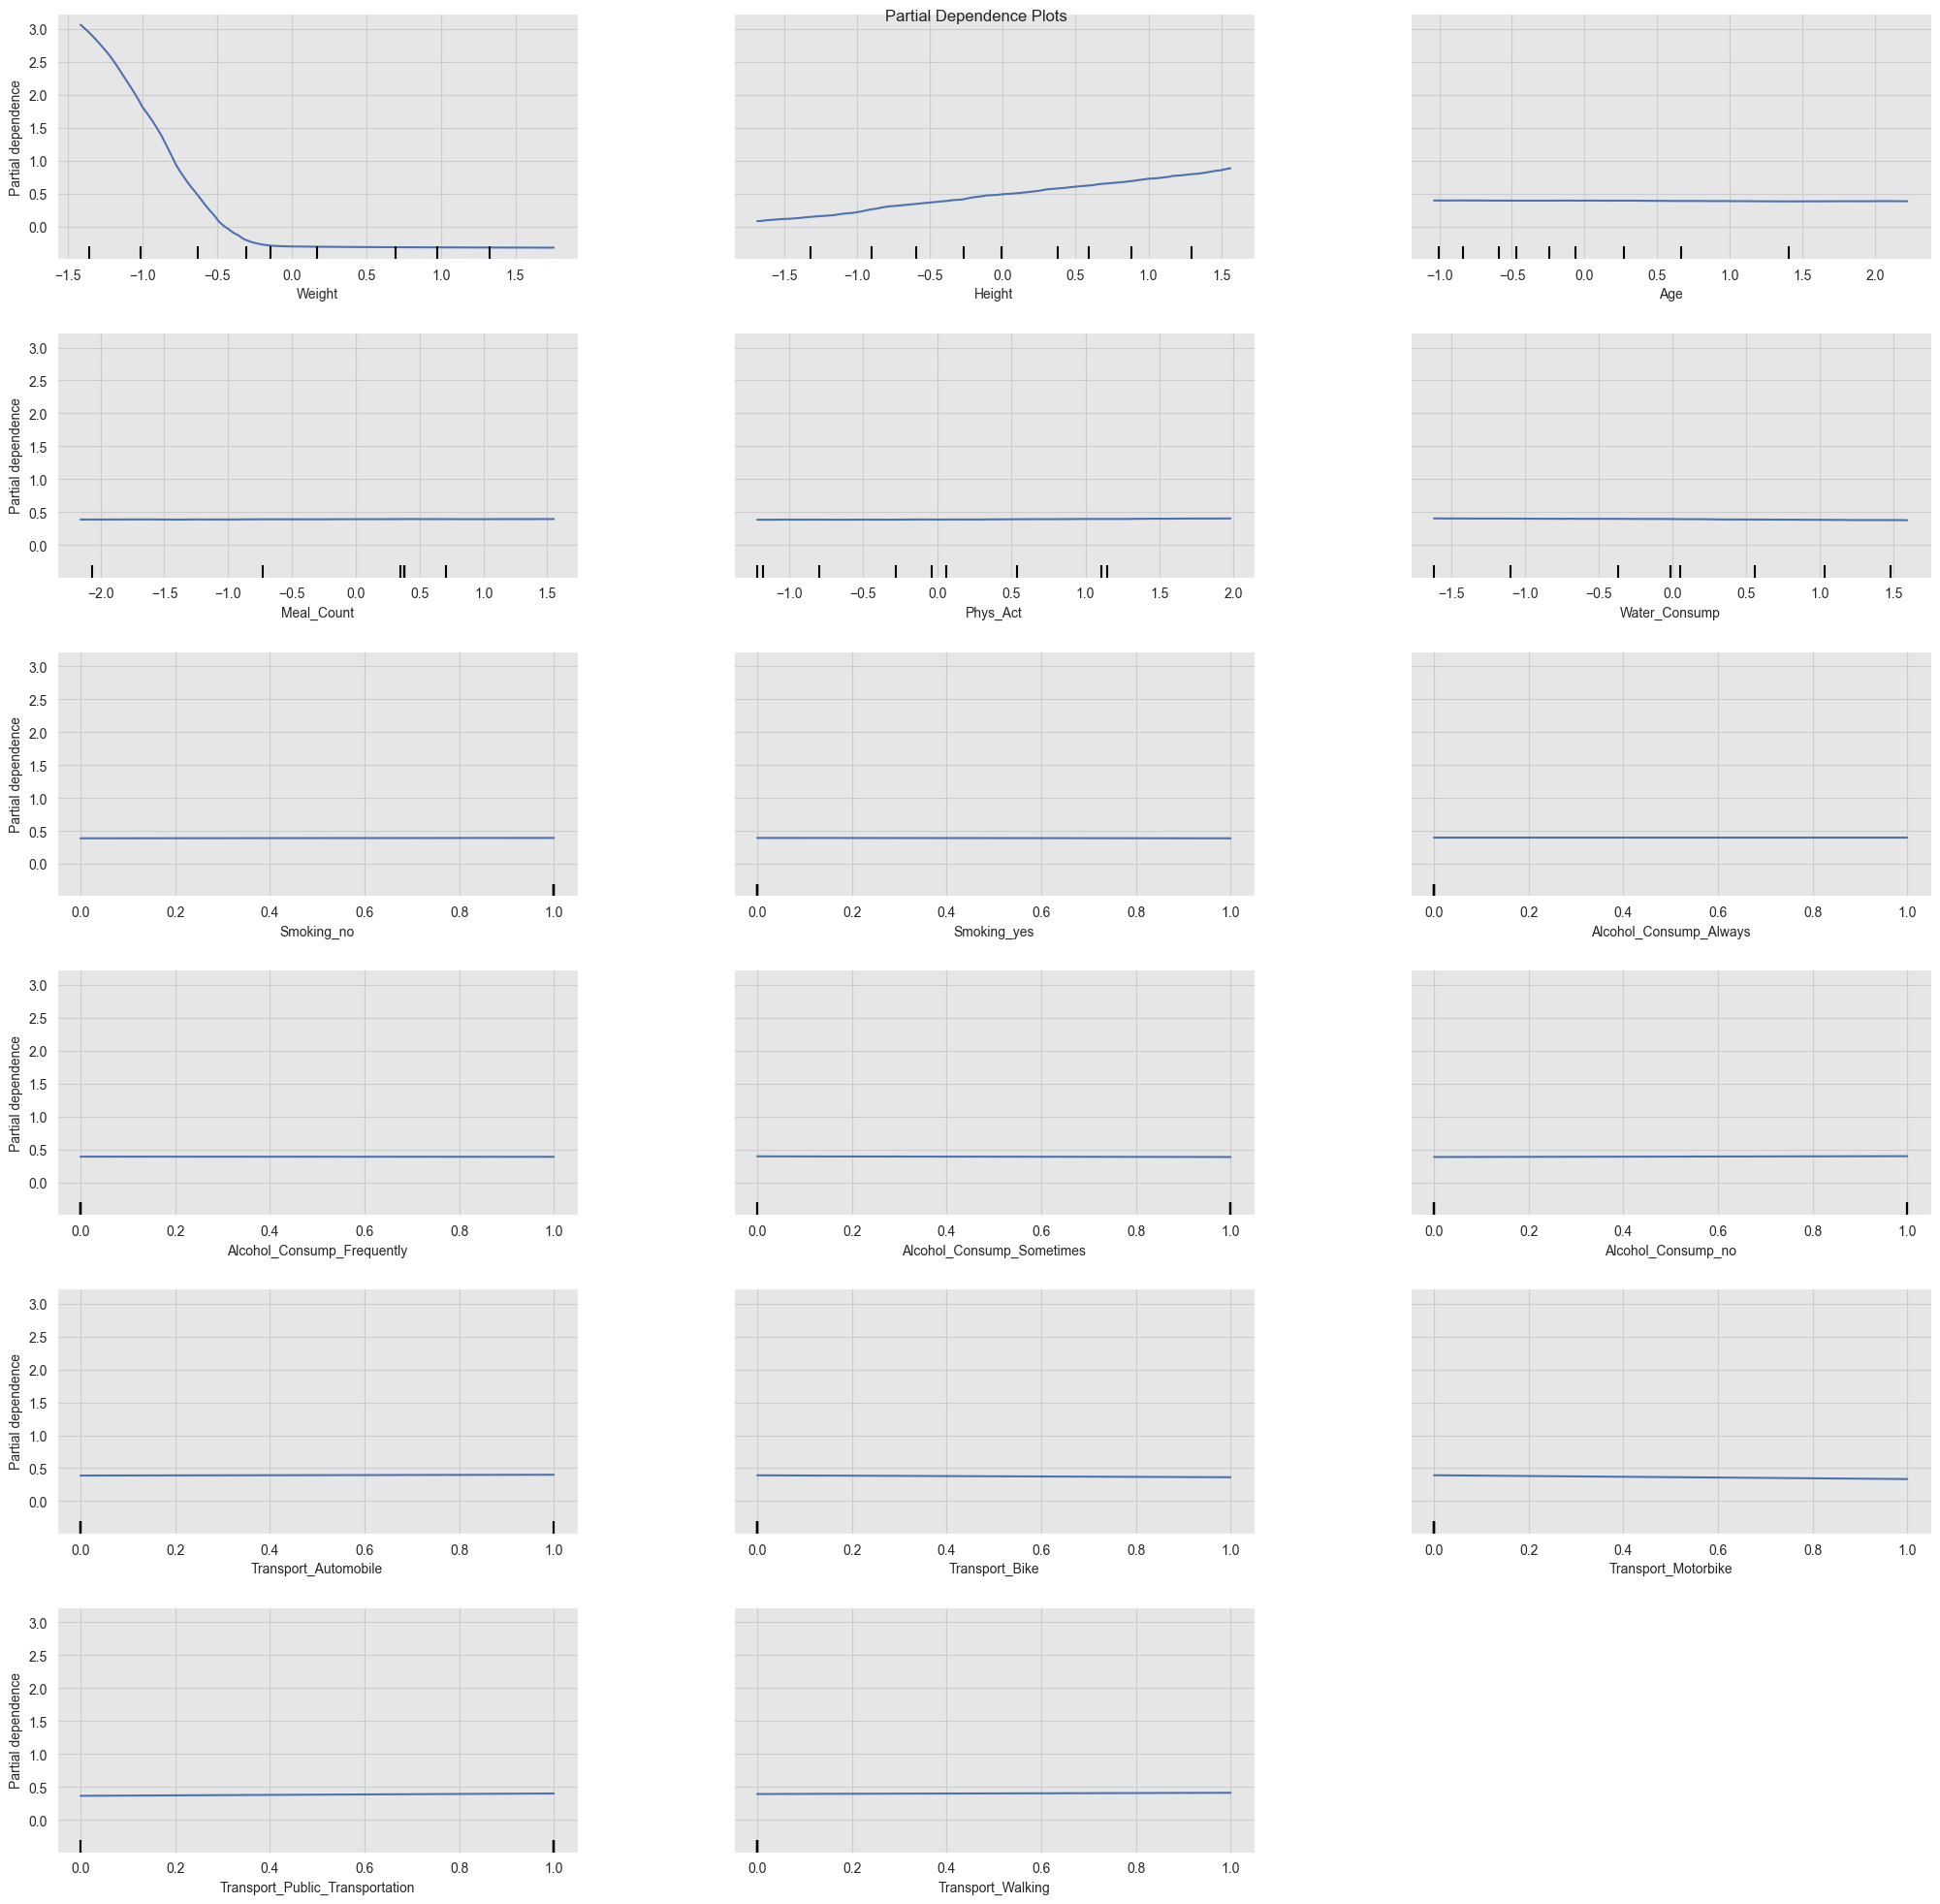

In [8]:
plt = util.getPartialDependenciesPlot(svm, X)
plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [9]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear']
}


### Grid Search


In [10]:
grid_search = util.getGridSearch(estimator=SVC(gamma='auto', kernel='linear', C=1.0, random_state=0),
                                 param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_val, y_val))


Best parameters found: {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
Best score found: 0.9680629676327059
Test score with best parameters: 0.9609208353581533


### Heatmap


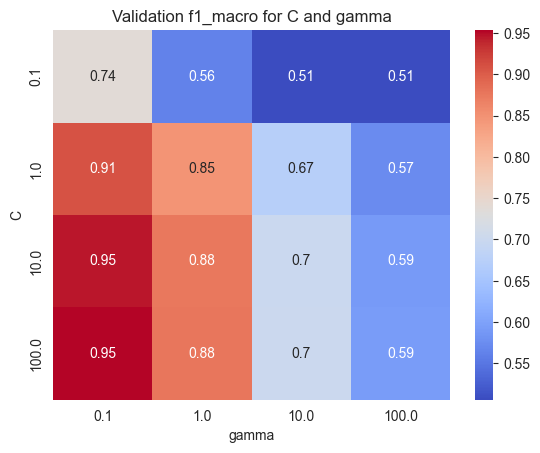

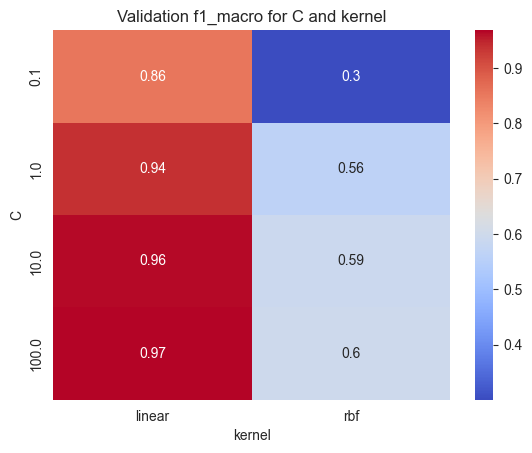

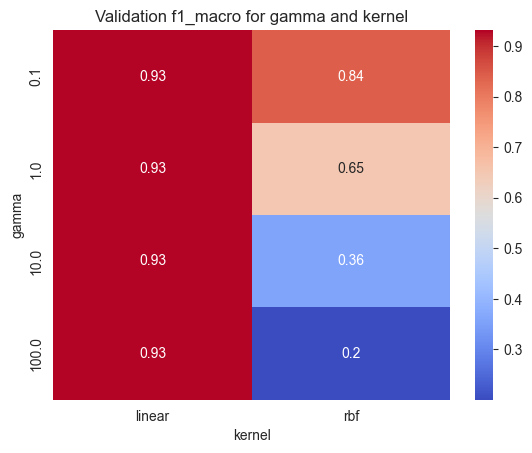

In [11]:
util.plotHyperParamHeatMaps(param_grid, grid_search)


### Train-Validation Curve


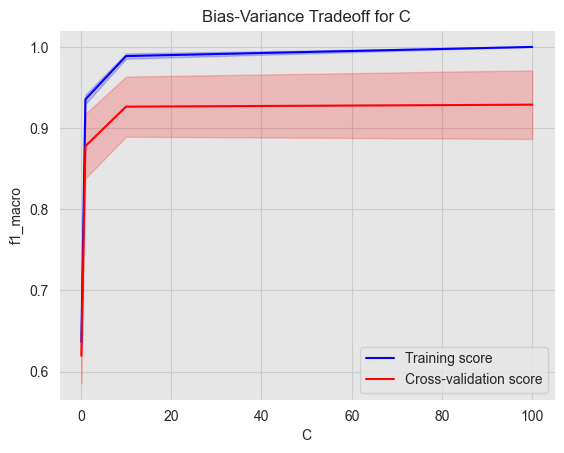

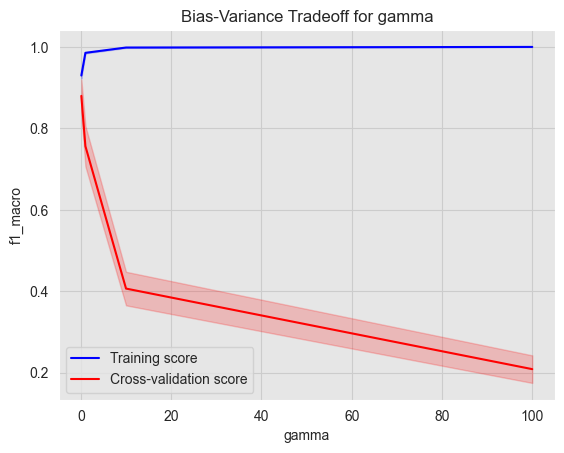

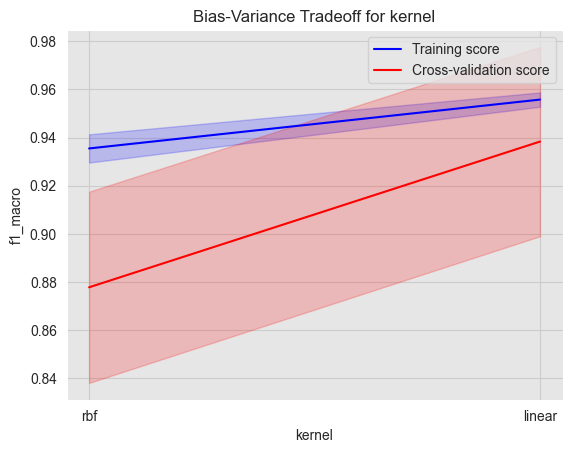

In [12]:

util.plotHyperParamTrainValidationCurve(estimator=SVC(
), param_grid=param_grid, X=X_train, y=y_train, cv=10, scoring='f1_macro')


## Bias-Variance Analysis


In [13]:

svm = SVC(gamma='auto', kernel='linear', C=1.0, random_state=0)

mse, bias, var = util.getBiasVariance(
    svm, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)


In [14]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)


mse:  0.040464135021097046
bias:  0.025399578059071722
var:  0.015064556962025315


### Decision Boundary Plot
